In [1]:
!pip install pandas_ml

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
# importing necessary libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm 
from scipy.stats import pearsonr
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import itertools

# Use ggplot style for visulizations
plt.style.use('ggplot')

In [1]:
!pip install seaborn

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
# Import HIV data
data = pd.read_excel('HIV1.xlsx', index=False)

# Read the required columns
data = data[['sample_id', 'data_1', 'Cutoff ', 'data_2', 'Cutoff .1']]

# Set new column names
data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

# Change negative and positive values to 0 and 1 respectively 
data = data.replace('POSITIVE', 1)
data = data.replace('Negative', 0)


# Print columns and head
print(data.columns)
data.head()

Index(['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp'], dtype='object')


,id,evo_data,evo_resp,rmp_data,rmp_resp
0,17V0161024,0.18,0,0.09,0
1,17V0161767,4.05,1,3.90,1
2,17V0161827,0.12,0,0.06,0
3,17V0161840,0.12,0,0.05,0
4,17V0161877,0.12,0,0.06,0


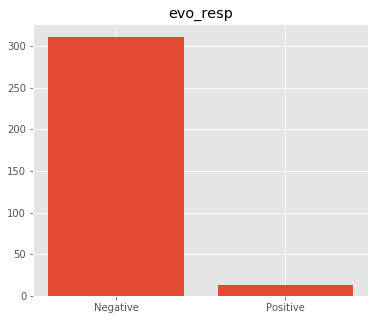

0    311
1     13
Name: evo_resp, dtype: int64

In [6]:
x = np.arange(2)
y =data.evo_resp.value_counts()


from pylab import rcParams
rcParams['figure.figsize'] = 6,5
plt.bar(x, y)
plt.xticks(x, ('Negative', 'Positive'))
plt.title('evo_resp')
plt.show()
y

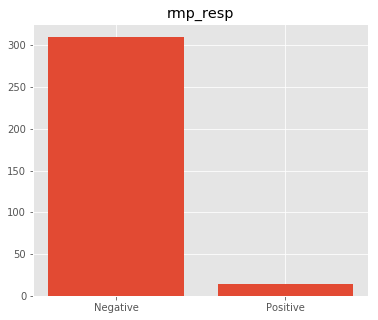

0    310
1     14
Name: rmp_resp, dtype: int64

In [7]:
x = np.arange(2)
y =data.rmp_resp.value_counts()


from pylab import rcParams
rcParams['figure.figsize'] = 6,5
plt.bar(x, y)
plt.xticks(x, ('Negative', 'Positive'))
plt.title('rmp_resp')
plt.show()
y

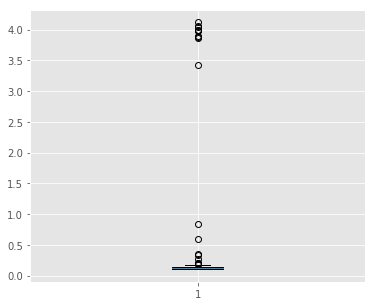

In [8]:
# Describe the 5 point statistics of the dataset
plt.boxplot(data['evo_data']);
plt.show()

In [9]:
# Describe the 5 point statistics of the dataset
print(data.evo_data.describe())

count    324.000000
mean       0.251852
std        0.659762
min        0.100000
25%        0.110000
50%        0.130000
75%        0.140000
max        4.120000
Name: evo_data, dtype: float64


In [10]:
data.rmp_data.describe()

count    324.000000
mean       0.159907
std        0.549919
min        0.040000
25%        0.050000
50%        0.060000
75%        0.060000
max        3.900000
Name: rmp_data, dtype: float64

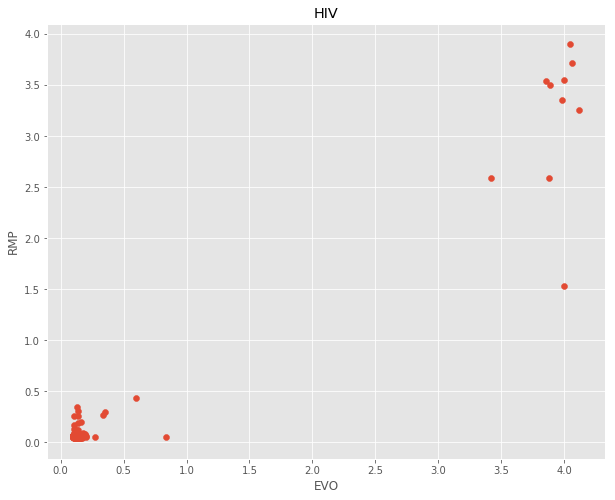

In [11]:
# Scatter plot between evo and rmp data readings 

from pylab import rcParams
rcParams['figure.figsize'] = 10,8
plt.scatter(data.evo_data, data.rmp_data)
plt.xlabel('EVO')
plt.ylabel('RMP')
plt.title('HIV')
plt.show()

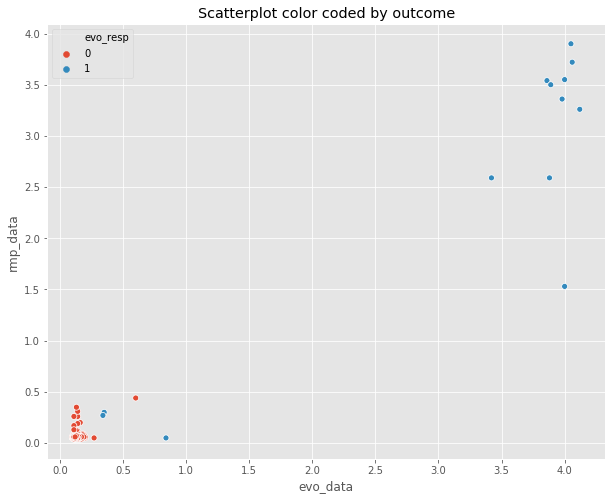

In [25]:
# !conda remove seaborn
# import seaborn as sns
sns.scatterplot(x='evo_data', y='rmp_data', hue='evo_resp', data=data, legend='full' )
plt.title('Scatterplot color coded by outcome')
# plt.legend(data.rmp_data, ['negative', 'positive'])
plt.show()

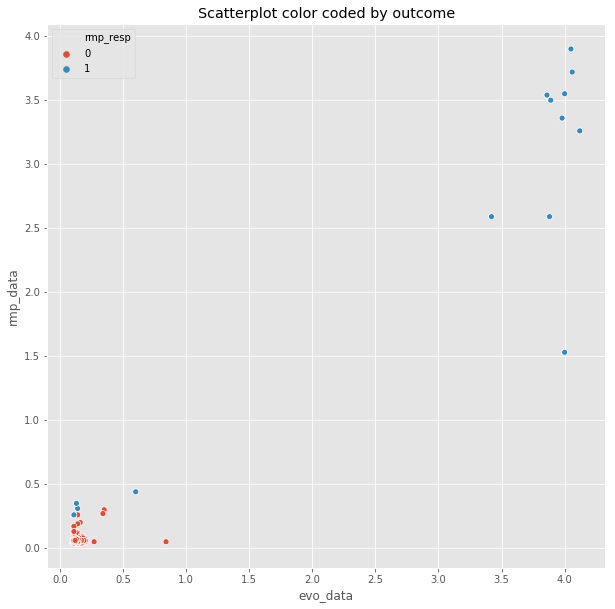

In [37]:
# !conda remove seaborn
# import seaborn as sns
sns.scatterplot(x='evo_data', y='rmp_data', hue='rmp_resp', data=data, legend='full' )
plt.title('Scatterplot color coded by outcome')
# plt.legend(data.rmp_data, ['negative', 'positive'])
plt.show()

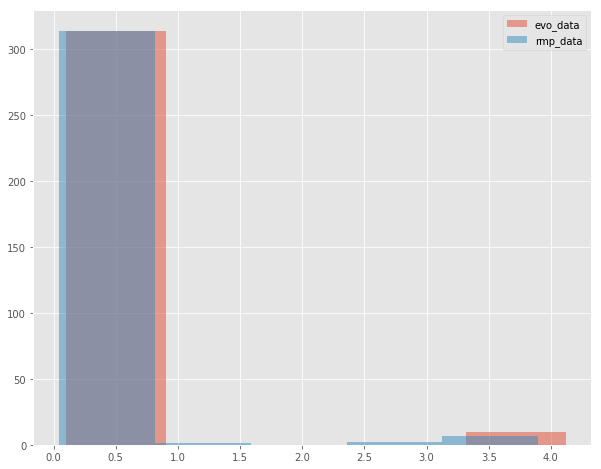

In [13]:
# Plot histograms to inspect the typical values

data['evo_data'].hist(bins=5, label='evo_data', alpha=0.5)
data['rmp_data'].hist(bins=5, label='rmp_data', alpha=0.5)
plt.legend()
plt.show()


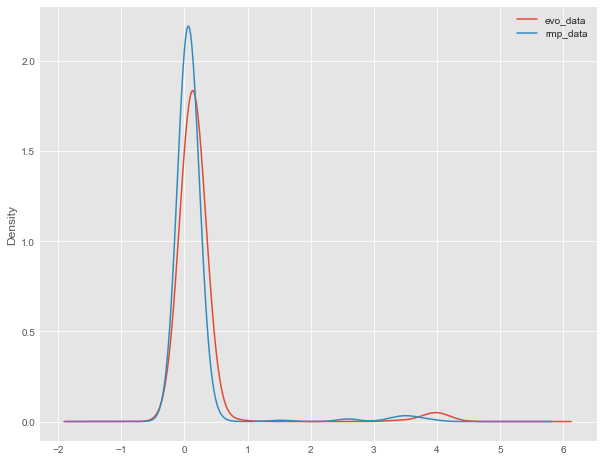

In [85]:
# Plot distributions as overlapping kde plots

kde = data[['evo_data', 'rmp_data']].copy()
kde.plot.kde()
plt.show()

In [29]:
plot1 = data.evo_data
plot2 = data.rmp_data
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )
euclidean_distance

0.17492855684535893

## Kolmogorov Smirnov Test

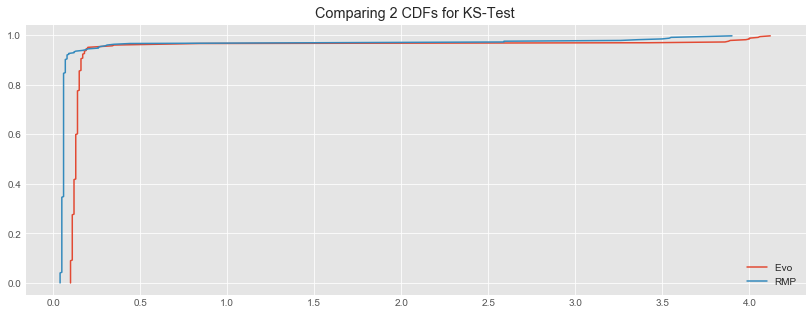

In [94]:
# Plot the CDFs
def ks_plot_comp(data_1, data_2):
    '''
    Data entereted must be the same size.
    '''
    
    data_2 = data_2
    length = len(data_1)
    plt.figure(figsize=(14, 5))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend('top right')
    plt.legend(['Evo ', 'RMP'])
    plt.title('Comparing 2 CDFs for KS-Test')
    plt.show()
    
ks_plot_comp(data.evo_data, data.rmp_data)

In [95]:
from scipy import stats 
stats.ks_2samp(data.evo_data, data.rmp_data)

Ks_2sampResult(statistic=0.92901234567901236, pvalue=2.4592686309976408e-124)

In [26]:
# evo_stan = [(x - data['evo_data'].mean())/data['evo_data'].std() for x in data['evo_data']]
# rmp_stan = [(x - data['rmp_data'].mean())/data['rmp_data'].std() for x in data['rmp_data']]
# ks_plot_comp(evo_stan, rmp_stan)
# # from sklearn.preprocessing import StandardScaler
# # stand = StandardScaler().fit_transform(data_stand)
# # stand[0]

In [116]:
from scipy import stats 
stats.ks_2samp(evo_stan, rmp_stan)

Ks_2sampResult(statistic=0.25308641975308643, pvalue=1.273411402162592e-09)

In [28]:
# Convert data to numpy arrays and calculate pearson correlation coefficient

x = np.array(data.evo_data)
y = np.array(data.rmp_data)

In [29]:
# Pearson Correlation

corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.974


In [31]:
# Effect Size Measurement

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


d = cohend( y,x )
print('Cohens d: %.3f' % d)

Cohens d: -0.151


In [32]:
# Run Independant and dependant t-tests 

from scipy import stats
stats.ttest_ind(y,x)

Ttest_indResult(statistic=-1.9268981375555854, pvalue=0.054430607516559808)

In [33]:
stats.ttest_rel(y,x)

Ttest_relResult(statistic=-9.4222498297760886, pvalue=8.7785316405155275e-19)

In [34]:
# Calculate confusion and matrix and diagnosticsa

EVO=np.hstack(np.array(data['evo_resp']))
RMP=np.hstack(np.array(data['rmp_resp']))

cm = ConfusionMatrix(RMP, EVO)
print(cm)
cm.print_stats()

Predicted    0   1  __all__
Actual                     
0          307   3      310
1            4  10       14
__all__    311  13      324
population: 324
P: 14
N: 310
PositiveTest: 13
NegativeTest: 311
TP: 10
TN: 307
FP: 3
FN: 4
TPR: 0.714285714286
TNR: 0.990322580645
PPV: 0.769230769231
NPV: 0.987138263666
FPR: 0.00967741935484
FDR: 0.230769230769
FNR: 0.285714285714
ACC: 0.978395061728
F1_score: 0.740740740741
MCC: 0.730030064181
informedness: 0.704608294931
markedness: 0.756369032896
prevalence: 0.0432098765432
LRP: 73.8095238095
LRN: 0.288506281992
DOR: 255.833333333
FOR: 0.0128617363344


Confusion matrix, without normalization
[[307   3]
 [  4  10]]


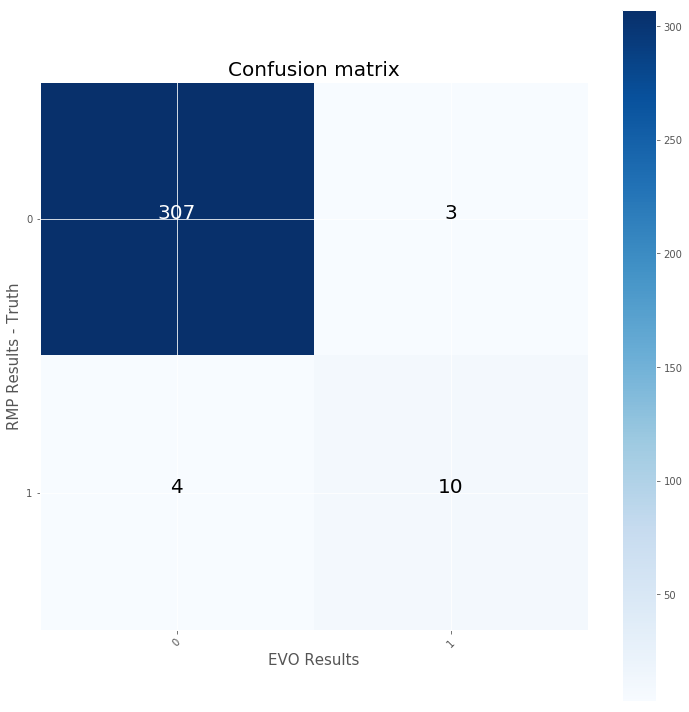

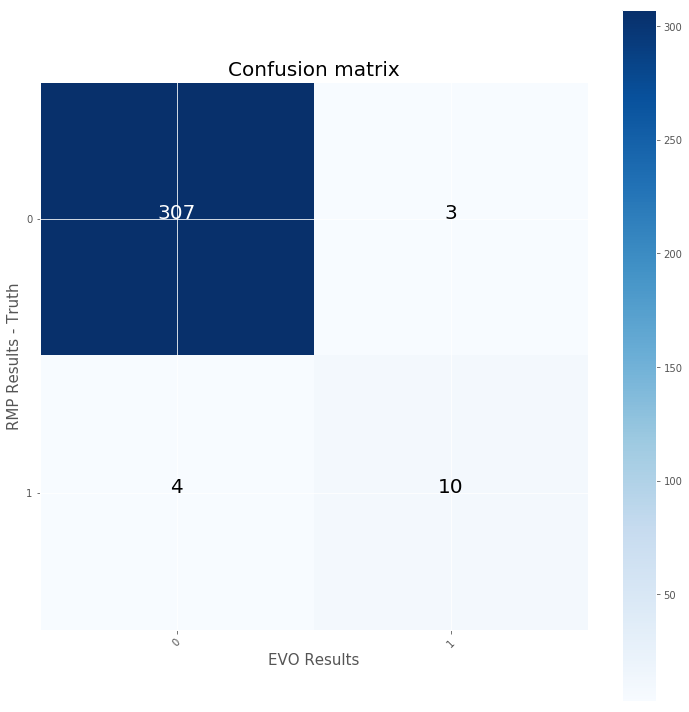

In [36]:
# Draw Confusion matrix for report
# Motivation for this visualization has been taken from stackoverflow discussion at:
# https://stackoverflow.com/questions/48817300/sklearn-plot-confusion-matrix-combined-across-trainingtest-sets

from pylab import rcParams
rcParams['figure.figsize'] = 10,10

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt ), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('RMP Results - Truth', fontsize=15)
    plt.xlabel('EVO Results', fontsize=15)


cm = confusion_matrix(RMP, EVO)

plt.figure()
plot_confusion_matrix(cm, classes = [0,1], title='Confusion matrix')
plt.show()